## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
dataset=pd.read_csv("Position_Salaries.csv")
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
X=dataset.iloc[:, 1:-1].values
y=dataset.iloc[:, -1].values

In [6]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [7]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Model Training

In [8]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
X_poly=pf.fit_transform(X)
X_poly=pf.transform(X)
df=pd.DataFrame(X_poly)
df

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X, y)
y_pred=lr.predict(X)

In [10]:
lr_poly=LinearRegression()
lr_poly.fit(X_poly, y)
y_poly=lr_poly.predict(X_poly)

## Result Comparision

In [11]:
from sklearn.metrics import r2_score
print("Score for Normal Regression:", r2_score(y, y_pred))
print("Score for Polynomial Regression:", r2_score(y, y_poly))

Score for Normal Regression: 0.6690412331929895
Score for Polynomial Regression: 0.9973922891706614


## Visualization

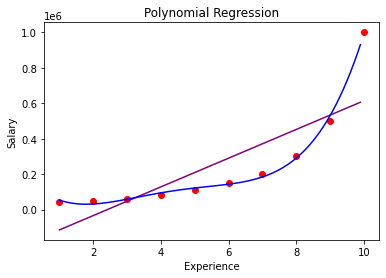

In [12]:
X_grid=np.arange(min(X), max(X), 0.1).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, lr.predict(X_grid), color='purple')
plt.plot(X_grid, lr_poly.predict(pf.fit_transform(X_grid)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()